In [1]:
import pandas as pd
import numpy as np

In [2]:
# Dataset original
df = pd.read_csv('data/esets_lung_exprs_genes.txt',sep="\t",header=None,index_col=0)

C:\Users\Raul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,

In [3]:
# Código de Jorge
df2=df.transpose()
df2.columns=df2.columns.fillna('sample_name')
df2['sample_name']=df2['sample_name'].str[:9]
df3=pd.read_csv('data/E-MTAB-6699.sdrf.txt', sep="\t",header=0,index_col=False)
df4=df3.drop(['Extract Name','Factor Value[disease]'],axis=1)
df5=df3.drop(df4,axis=1)
df5['Tumor']=np.where(df5['Factor Value[disease]']=='tumor',1 ,0)
df6=df5.drop(['Factor Value[disease]'],axis=1)
null_columns4=df2.columns[df2.isna().any()]
df2[null_columns4].isna().sum()
df7=df2.merge(df6,how='inner',left_on='sample_name',right_on='Extract Name',left_index=True)
df7.set_index(df7['sample_name'],inplace=True)
df7=df7.drop(['sample_name','Extract Name'],axis=1)
df_caract=df7.drop('Tumor',axis=1)
df_result=df7.drop(df_caract,axis=1)

In [4]:
# Separación de data de entrenamiento 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_caract,df_result,test_size=0.1,random_state=42)

In [5]:
# Revisar el tema de los indices, se dropean para probar.
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_train.sample(3)

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,...,NAF1,CCDC63,C16orf52,LOC101929475,LOC389641,LOC400499,GALR3,NUS1P3,TMEM231,LOC100505915
738,7.49413595833106,8.13788165568418,7.36779399373438,5.79497609237748,6.92448154427556,7.77730689675377,10.6924557447352,5.09168818509328,7.53169043351788,7.68293455522461,...,6.45626,4.71196,3.59511,4.08152,4.65641,5.97067,6.11189,3.6802,5.90635,5.22145
928,8.24148597859692,7.78240902268238,7.52259875984829,5.52336124129377,6.74788947614486,7.02819757775699,9.06862672395782,4.45311126063989,6.10035693270223,7.63436917762029,...,8.37828,4.35032,4.99272,6.4414,5.22926,5.90388,6.355,5.44243,6.60227,5.36658
404,7.71370405126863,7.77856568519506,7.44641078744677,5.58770950463891,6.99473756546435,7.50096270171303,8.39809940653528,4.95726179743731,6.970195589438,7.10294630837305,...,6.86602,4.99445,3.44807,4.73845,5.13552,6.30274,5.64621,4.54436,7.06793,5.81238


In [9]:
# RadomForest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfcla = RandomForestClassifier()
rfcla

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
# Un hiperparámetro importante es **n_estimators**, 
# que es la cantidad de árboles que se deben entrenar. 
# Debe ser un valor lo suficientemente grande como para que el error parezca haberse "estabilizado".
# Listar los valores a probar
from sklearn.model_selection import cross_val_score

estimator_range = range(10, 310, 10)

# Definir un lista para almacenar los promedios de los Auc por cada valor de "max_depth"
AUC_scores = []

# Usa una validación cruzada de 5 folds con cada valor del "n_estimators"
for estimator in estimator_range:
    rfcla = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    AUC_score = cross_val_score(rfcla, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc')
    AUC_scores.append(np.mean(AUC_score))
    #print(estimator)

Text(0, 0.5, 'AUC')

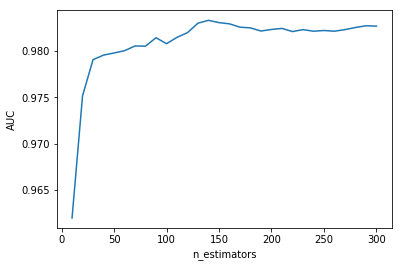

In [13]:
# Graficar n_estimators (eje x) versus AUC (eje y)
import matplotlib.pyplot as plt 

plt.plot(estimator_range, AUC_scores)
plt.xlabel('n_estimators')
plt.ylabel('AUC')

In [14]:
sorted(zip(AUC_scores, estimator_range), reverse=True)[0]

(0.9833435153366425, 140)

In [ ]:
# Listar los valores para "max_features"
# Toma mucho tiempo analizar toda la data

feature_range = range(1, len(y_train)+1)

# Definir un lista para almacenar los promedios de los Auc por cada valor de "max_features"
AUC_scores = []

# Use una validación cruzada de 10 folds para cada valor de "max_features"
for feature in feature_range:
    rfdec = RandomForestClassifier(n_estimators=150, max_features=feature, random_state=1, n_jobs=-1)
    AUC_score = cross_val_score(rfdec, X_train, y_train.values.ravel(), cv=10, scoring='roc_auc')
    AUC_scores.append(np.mean(AUC_score))

In [ ]:
# Graficar max_features (eje x) versus AUC (eje y)
plt.plot(feature_range, AUC_scores)
plt.xlabel('max_features')
plt.ylabel('AUC')

In [ ]:
# Mostrar el mejor AUC y su correpondiente "max_features"
sorted(zip(AUC_scores, feature_range), reverse=True)[0]

In [17]:
# Tomando el resultado
rfreg = RandomForestRegressor(n_estimators=140, max_features=6, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=140, n_jobs=None, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [20]:
# KappaScore

from sklearn.metrics import cohen_kappa_score

y_predict = rfreg.predict(X_test)

tup_y_predict = list(y_predict)
tup_y_train = list(np.transpose(y_test['Tumor']))

tup_y_predict = [int(i) for i in tup_y_predict]
cohen_kappa_score(tup_y_train,tup_y_predict)

0.005298793052693651